###### all analysis conserved at this dir.

In [1]:
cd /data5/galaxy/project/promoter_new_version/data/total/hand_work/2kb_2kb

/data5/galaxy/project/promoter_new_version/data/total/hand_work/2kb_2kb


In [19]:
import os
import glob
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# os.makedirs("data")
# os.makedirs("analysis")

In [3]:
df = pd.read_table("/data/database/GRCh38/GENCODE/Genes_ensembl.bed", sep="\t", header=None, names=["chr", "start", "end", "gene id", "score", "strand"])
df["score"] = df["end"] - df["start"]
df.head()

,chr,start,end,gene id,score,strand
0,chr1,11869,14409,ENSG00000223972,2540,+
1,chr1,14404,29570,ENSG00000227232,15166,-
2,chr1,17369,17436,ENSG00000278267,67,-
3,chr1,29554,31109,ENSG00000243485,1555,+
4,chr1,30366,30503,ENSG00000284332,137,+


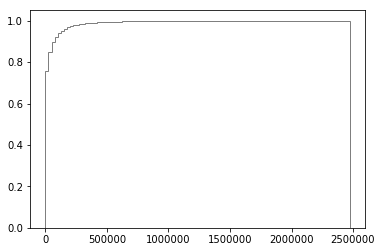

In [7]:
import matplotlib.mlab as mlab
data_list = df["score"]
num_bins, mean, std = 100, np.mean(data_list), np.std(data_list)
plt.hist(data_list, num_bins, normed=1, histtype="step", color="black", cumulative=True, alpha=0.5)
# y = mlab.normpdf(bins, mean, std)
# plt.plot(bins, y, "r--")
plt.show()

In [9]:
min(df["score"])

7

In [10]:
max(df["score"])

2473536

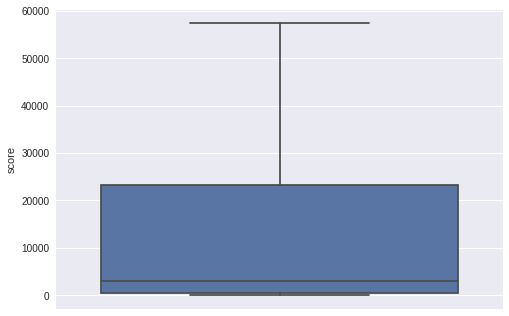

In [26]:
df_chr_others = df[df["chr"] != "chrM"]
df_others = df_chr_others.sort_values(by=["score"], ascending=True)
# df_others.head(n=50)
sns.boxplot(df_others["score"], orient="v", showfliers=False)
plt.show()

In [13]:
df["promoter_start"] = np.where(df["strand"] == "+", df["start"] - 2000, df["end"] - 2000)
df["promoter_end"] = np.where(df["strand"] == "+", df["start"] + 2000, df["end"] + 2000)
df_keep = df.copy()[(df["promoter_start"] > 0) & (df["promoter_end"] > 0) & (df["chr"] != "chrM")]
df_keep = df_keep[["chr", "promoter_start", "promoter_end", "gene id", "score", "strand"]].sort_values(by=["chr", "promoter_start"])
df_keep["score"] = df_keep["promoter_end"] - df_keep["promoter_start"]
df_keep.to_csv("/data5/galaxy/project/promoter_new_version/data/total/hand_work/2kb_2kb/promoter_2k-2k.bed", sep="\t", header=None, index=False)
df_keep.head()

,chr,promoter_start,promoter_end,gene id,score,strand
0,chr1,9869,13869,ENSG00000223972,4000,+
2,chr1,15436,19436,ENSG00000278267,4000,-
3,chr1,27554,31554,ENSG00000243485,4000,+
1,chr1,27570,31570,ENSG00000227232,4000,-
4,chr1,28366,32366,ENSG00000284332,4000,+


In [14]:
len(df) - len(df_keep)

37

In [27]:
len(df_keep)

58251